In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import numpy as np
import scipy
from scipy.optimize import curve_fit

#### load data

In [14]:
input_csv = "vidro-1kHz-40mBias7.csv"

df = pd.read_csv(input_csv, comment='#', names=['x', 'y', 'p', 't'])
df.head()

,x,y,p,t
0,719,511,1,5168
1,720,511,1,5168
2,721,511,1,5168
3,722,511,1,5168
4,723,511,1,5168


### Filter (small region just to calculate phase per pixel)


In [15]:
%matplotlib inline
# Define the parameters
tmin = 1100000
tmax = 1100050
ymin = 118
ymax = 530
xmin = 720
xmax = 725
y = 500

# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()


Number of data points: 972
             x    y  p        t
132676902  720  345  1  1100000
132676912  720  337  1  1100000
132676913  722  337  1  1100000
132676914  724  337  1  1100000
132676927  723  336  1  1100000
...        ...  ... ..      ...
132682821  724  338  0  1100050
132682849  720  329  1  1100050
132682860  720  328  1  1100050
132682861  722  328  1  1100050
132682862  724  328  1  1100050

[972 rows x 4 columns]
Time range: 1100000 to 1100050


### y FRINGES


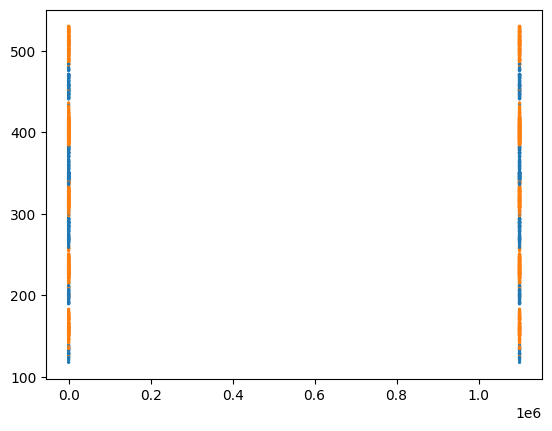

In [16]:
line_df['x'],line_df['y'],line_df['t'],line_df['p']

colors = ["C0", "C1"]

colors_vec = [colors[p] for p in line_df['p']]
x = line_df['x']
p = line_df['p']
t = line_df['t']
y = line_df['y']

x = np.array(x)
y = np.array(y)
t = np.array(t)
p = np.array(p)

splity = 50
#y = np.mod(y, splity)
pos = 1*np.ones(len(t))
plt.scatter(pos, y, s=2, c=colors_vec)
plt.scatter(t, y, s=2, c=colors_vec)


### Finding split zones

array([ 94, 231, 368, 562], dtype=int64)

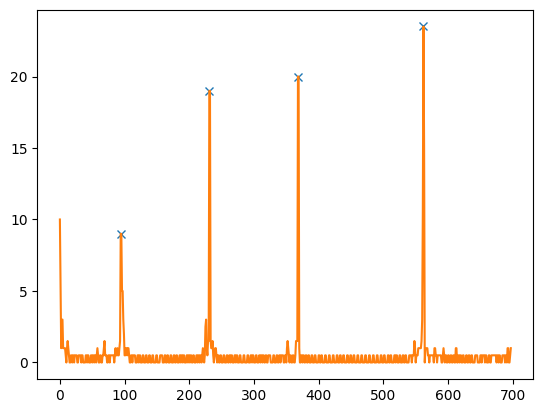

In [17]:
idx = np.argsort(y)

x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

yp = y[p==1]
yn = y[p==0]
split_idx = np.where(np.diff(yp)>5)
gradyp = np.gradient(yp)
from scipy.signal import find_peaks

peaksidx, _ = find_peaks(gradyp, distance=100, prominence=2)

plt.plot(peaksidx, abs(gradyp[peaksidx]), "x")

plt.plot(gradyp)
#plt.plot(np.diff(yn))
peaksidx



### centroid of fringes and determination of phase per pixel

[160.45744680851064, 233.3065693430657, 320.007299270073, 403.41237113402065, 507.75735294117646] [ 72.84912253  86.70072993  83.40507186 104.34498181]


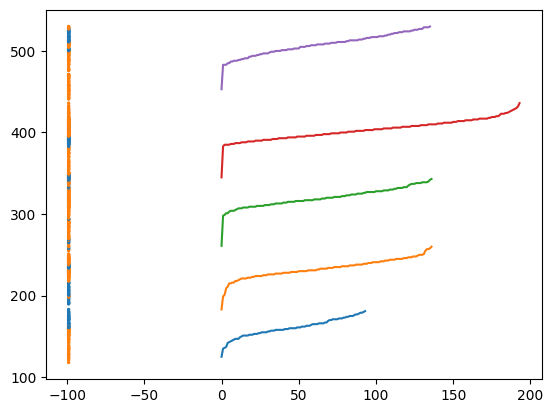

In [18]:
plt.scatter(pos-100, y, s=2, c=colors_vec)

centroids = []
for yvals in np.split(yp, peaksidx):
    plt.plot(yvals)

    centroids.append(np.mean(yvals))

print(centroids,np.diff(centroids))

pixels_per_period = 85
phaseperpixel = 2*np.pi/pixels_per_period

### filter data (main data- bigger time period)

In [19]:
%matplotlib inline
# Define the parameters
tmin = 1100000
tmax = 1150000
tmax = 2000000
ymin = 200
ymax = 390
ymax = 450
xmin = 720
xmax = 725
y = 500

# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()


Number of data points: 3884359
             x    y  p        t
132676902  720  345  1  1100000
132676912  720  337  1  1100000
132676913  722  337  1  1100000
132676914  724  337  1  1100000
132676927  723  336  1  1100000
...        ...  ... ..      ...
167101239  725  205  0  1384249
167101240  722  205  1  1384249
167101241  723  205  1  1384249
167101442  720  448  0  1384254
167101459  720  450  0  1384254

[3884359 rows x 4 columns]
Time range: 1100000 to 1384254


### phase per pixel method application

[345 343 342 ... 207 207 206]
2753740
[60 58 57 ...  7  7  6]


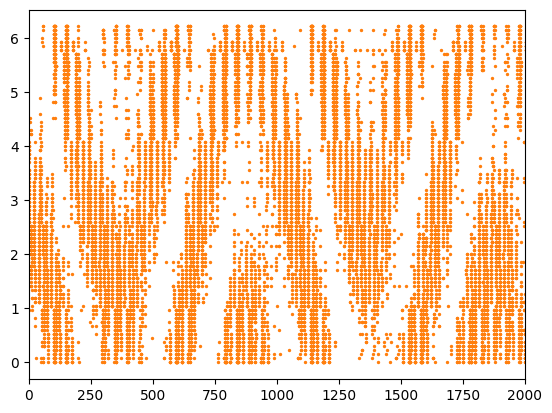

In [20]:

colors = ["C0", "C1"]

colors_vec = [colors[p] for p in line_df['p']]
x = line_df['x']
p = line_df['p']
t = line_df['t']
y = line_df['y']

x = np.array(x)
y = np.array(y)
p = np.array(p)
t = np.array(t)

idx = np.argsort(t)

x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

t = t-t[0]

yp = y[p==1]
tp = t[p==1]
yn = y[p==0]

print(yp)
print(len(yp))

tp = tp-tp[0]

yp = yp-ymin
yp = np.mod(yp, pixels_per_period)
#yp = np.mod(yp, 84)

tp_uniques = np.unique(tp)

phase = yp*phaseperpixel
plt.scatter(tp, phase, s=2, c="C1")
plt.xlim(0,2000)
print(yp)

### Calculation of phase (centroids)

In [21]:
tp_uniques = np.unique(tp)
centroid_y = []
tval_vec = []

for i,tval in enumerate(tp_uniques):
    yval = phase[tp==tval]
    ycomplex = np.cos(yval)+1j*np.sin(yval)

    ymean = np.angle(np.mean(ycomplex))

    
    #print(i, ymean)
    centroid_y.append(ymean)
    tval_vec.append(tval)

    if i > 5500:
        break

centroid_y = np.array(centroid_y)
tval_vec = np.array(tval_vec)


In [22]:
centroid_y,tval_vec

(array([-2.29273528, -2.85372336,  2.84121634, ...,  2.31610456,
         2.51327412,  0.87948161]),
 array([   0,    1,    2, ..., 9544, 9545, 9547], dtype=int64))

### phases of events over time

(0.0, 2000.0)

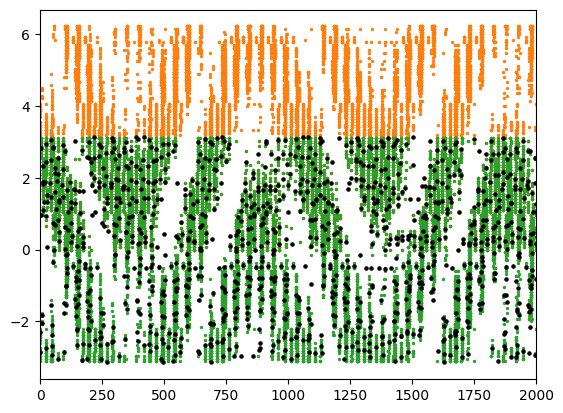

In [23]:
plt.scatter(tp, phase, s=2, c="C1")
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.xlim(0,2000)

### plot of the real and imaginary parts of complex numbers representing phase centroids

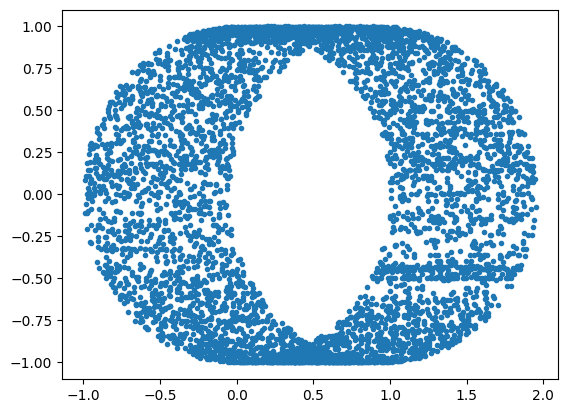

In [24]:
phase_complex = np.cos(centroid_y)+1j*np.sin(centroid_y)

#phase_complex = phase_complex[:100]

plt.plot(phase_complex.real+tval_vec/10000, phase_complex.imag, '.')


### Kalman filter to smooth the phase data derived from the centroid phases

(0.0, 2000.0)

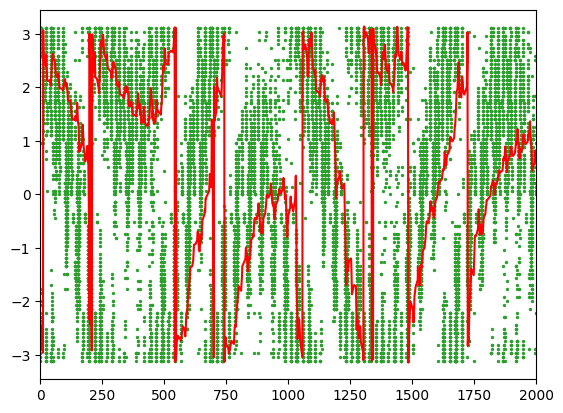

In [25]:
from kalman import KalmanTracking


Track = KalmanTracking()
Track.cov = 0.5 #Sets the initial covariance, representing the uncertainty in the initial state estimate.
Track.error_proc = 0.0001 #Sets the estimated process error, representing how much you expect the process to vary between steps.
Track.error_measurement = 0.3+0.3j #Sets the estimated measurement error, which includes both real and imaginary components.

complex_kalman = np.array([Track(c) for c in phase_complex])
phase_kalman = np.angle(complex_kalman)
#plt.plot(phase_complex.real+tval_vec/10000, phase_complex.imag, '.')
#plt.plot(phase_kalman.real+tval_vec/10000, phase_kalman.imag, '.')


plt.figure()
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
#plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.plot(tval_vec, phase_kalman, c="r")
plt.xlim(0,2000)

12.279890995313758

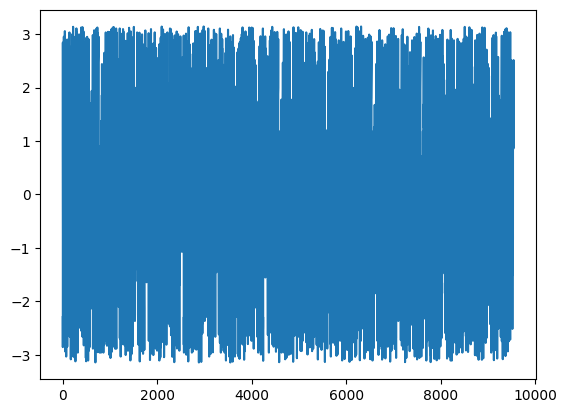

In [26]:
plt.plot(tval_vec, centroid_y)




np.ptp(np.diff(centroid_y)).max()


### Phase Unwrapping and Continuous Phase Analysis


NameError: name 'wavelength' is not defined

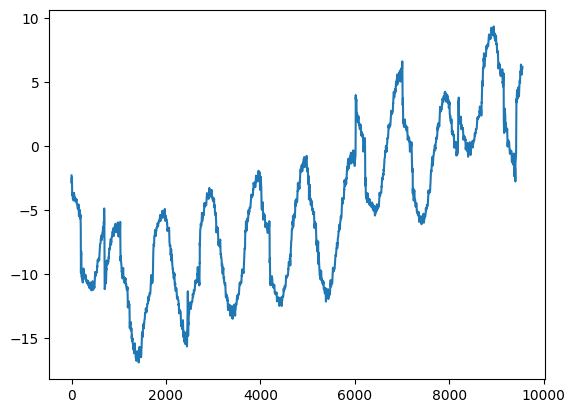

In [27]:

centroid_y = np.unwrap(centroid_y)
centroid_y = np.unwrap(phase_kalman)

diff_phase = centroid_y - np.append([centroid_y[0]], np.diff(centroid_y))
plt.plot(tval_vec, centroid_y)
#plt.plot(tval_vec, diff_phase)
z = centroid_y/(2*np.pi)*wavelength/2

plt.figure()
plt.plot(tval_vec, z/1e-6)


### Displacement calc (nano)

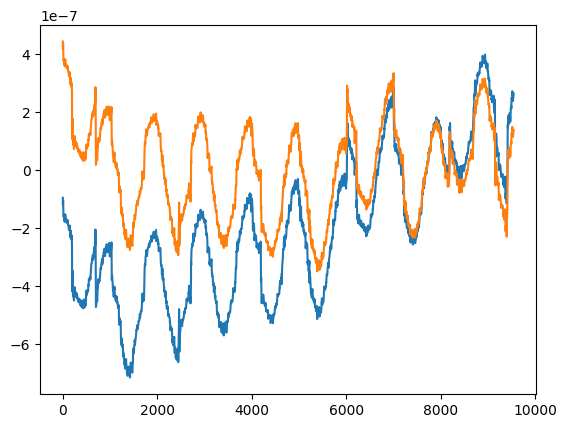

In [ ]:
t_step = 1

t_interp = np.arange(tval_vec.min(), tval_vec.max(), t_step)
z_interp = np.interp(t_interp, tval_vec, z)

plt.plot(t_interp, z_interp)

z_detrend = scipy.signal.detrend(z_interp)
plt.plot(t_interp, z_detrend)


### FFT for finding main frequency of the signal

(0.0, 10000.0)

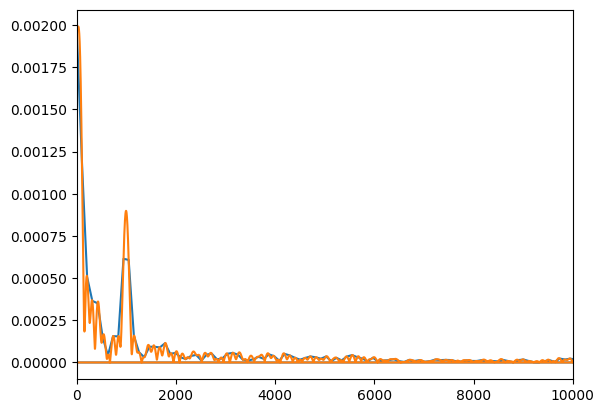

In [ ]:
a = np.pad(z_interp, len(z_interp)*2)
a = np.pad(z_interp, 2**20-1)


ft = np.fft.fft(z_interp)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

ft = np.fft.fft(a)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

plt.xlim(0, 10000)

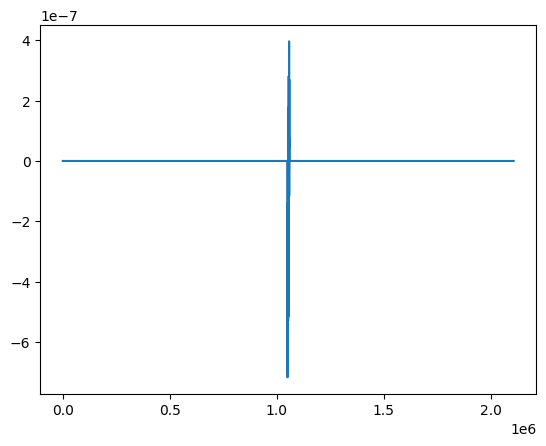

In [ ]:
#a = np.pad(z_interp, len(z_interp)*2)

plt.plot(a)